### 二分类五组交叉验证roc曲线

[0.7824074074074074, 0.8877314814814814, 0.8616898148148149, 0.8773148148148148, 0.9907773386034255]
0.06663059437101806


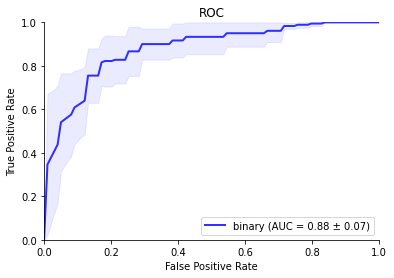

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.interpolate import interp1d

# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\2.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data['p_1']

# 确定分组数量
n_groups = len(data) // 60 + (len(data) % 60 > 0)

# 使用分组信息进行 k-fold 交叉验证
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
for i in range(n_groups):
    start_idx = i * 60
    end_idx = min((i + 1) * 60, len(data))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data)) if idx not in test_index]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_true.iloc[train_index], y_true.iloc[test_index]

    fpr, tpr, _ = roc_curve(y_test, X_test['p_1'])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0]=0.0
    auc_val = auc(fpr, tpr)
    aucs.append(auc_val)
print(aucs)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs, axis=0)
print(std_auc)
plt.plot(mean_fpr,mean_tpr,color='blue',label=f'binary (AUC = {mean_auc:.2f} ± {std_auc:.2f})',lw=2,alpha=.8)
std_tpr=np.std(tprs,axis=0)
tprs_upper=np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
plt.fill_between(mean_fpr,tprs_lower,tprs_upper,color='blue', alpha=0.08)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### 三分类roc曲线（未分组交叉验证）
#### 用于和二-三分类作对比 与分组交叉验证的三分类roc曲线不同

{0: 0.877700232635427, 1: 0.9271131073907718, 2: 0.772314986600701}


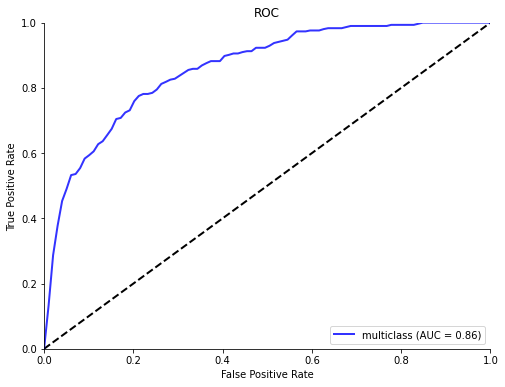

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.interpolate import interp1d

# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\3.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]  # 假设有三个类别的预测概率

# 计算平均 ROC 曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制平均 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(3):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= 3
mean_auc = np.mean(list(roc_auc.values()))
print(roc_auc)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=f'multiclass (AUC = {mean_auc:.2f})', lw=2, alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### 三分类5组交叉验证roc曲线（三个类别各一条）

Class 0 AUC: 0.79
Class 1 AUC: 0.99
Class 2 AUC: 0.79
Class 0 AUC: 0.91
Class 1 AUC: 0.86
Class 2 AUC: 0.76
Class 0 AUC: 0.84
Class 1 AUC: 1.00
Class 2 AUC: 0.78
Class 0 AUC: 0.91
Class 1 AUC: 0.97
Class 2 AUC: 0.83
Class 0 AUC: 0.98
Class 1 AUC: 0.89
Class 2 AUC: 0.90
0.06488923768195733
0.056967663591675356
0.048578548958694956


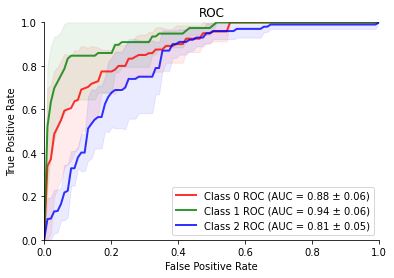

In [11]:
# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\3.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]

# 确定分组数量
n_groups = len(data) // 60 + (len(data) % 60 > 0)
# 使用分组信息进行 k-fold 交叉验证
mean_tpr = [0.0, 0.0, 0.0]
mean_fpr = np.linspace(0, 1, 100)
tprs = [[], [], []]
aucs = [[], [], []]

for i in range(n_groups):
    start_idx = i * 60
    end_idx = min((i + 1) * 60, len(data))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data)) if idx not in test_index]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_true.iloc[train_index], y_true.iloc[test_index]

    for j in range(3):
        fpr, tpr, _ = roc_curve(y_test == j, X_test[f'p_{j}'])
        mean_tpr[j] += np.interp(mean_fpr, fpr, tpr)
        tprs[j].append(np.interp(mean_fpr, fpr, tpr))
        tprs[j][-1][0] = 0.0
        auc_val = auc(fpr, tpr)
        aucs[j].append(auc_val)
        print(f'Class {j} AUC: {auc_val:.2f}')

for j in range(3):
    mean_tpr[j] = np.mean(tprs[j], axis=0)
    mean_tpr[j][-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr[j])
    std_auc = np.std(aucs[j], axis=0)
    print(std_auc)
    plt.plot(mean_fpr, mean_tpr[j], color=['red', 'green', 'blue'][j], label=f'Class {j} ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)
    std_tpr = np.std(tprs[j], axis=0)
    tprs_upper = np.minimum(mean_tpr[j] + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr[j] - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=['red', 'green', 'blue'][j], alpha=0.08)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

### 三分类五组交叉验证roc曲线
#### 用于与第一张二分类五组交叉验证roc曲线作对比

Class 0 AUC: 0.79
Class 1 AUC: 0.99
Class 2 AUC: 0.79
Class 0 AUC: 0.91
Class 1 AUC: 0.86
Class 2 AUC: 0.76
Class 0 AUC: 0.84
Class 1 AUC: 1.00
Class 2 AUC: 0.78
Class 0 AUC: 0.91
Class 1 AUC: 0.97
Class 2 AUC: 0.83
Class 0 AUC: 0.98
Class 1 AUC: 0.89
Class 2 AUC: 0.90
[0.8552290263748598, 0.8384020763187431, 0.8735185185185186, 0.9010437710437711, 0.9205352721650093]
0.029821260802355632
0.8765833677131436


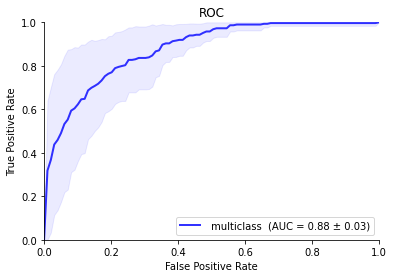

In [12]:
# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\3.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]

# 确定分组数量
n_groups = len(data) // 60 + (len(data) % 60 > 0)
# 使用分组信息进行 k-fold 交叉验证
mean_tpr = np.zeros((3, 100))
mean_fpr = np.linspace(0, 1, 100)
tprs = [[], [], []]
aucs = [[], [], []]

for i in range(n_groups):
    start_idx = i * 60
    end_idx = min((i + 1) * 60, len(data))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data)) if idx not in test_index]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_true.iloc[train_index], y_true.iloc[test_index]

    for j in range(3):
        fpr, tpr, _ = roc_curve(y_test == j, X_test[f'p_{j}'])
        mean_tpr[j] += np.interp(mean_fpr, fpr, tpr)
        tprs[j].append(np.interp(mean_fpr, fpr, tpr))
        tprs[j][-1][0] = 0.0
        auc_val = auc(fpr, tpr)
        aucs[j].append(auc_val)
        print(f'Class {j} AUC: {auc_val:.2f}')
result = [sum(x)/3 for x in zip(*aucs)]
std_auc = np.std(result)
print(result)
print(std_auc)
# 计算三个类别的平均 True Positive Rate
mean_tpr = np.mean([np.mean(tprs[j], axis=0) for j in range(3)], axis=0)
mean_tpr[-1] = 1.0

# 计算平均 ROC 曲线的 AUC
mean_auc = auc(mean_fpr, mean_tpr)
print(mean_auc)

# 绘制平均 ROC 曲线
plt.plot(mean_fpr, mean_tpr, color='blue', label=f' multiclass  (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)

# 填充平均 ROC 曲线下的区域
std_tpr = np.std(np.concatenate(tprs), axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='blue', alpha=0.08)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### 五组交叉验证条件下 二分类和三分类的对比

Class 0 AUC: 0.79
Class 1 AUC: 0.99
Class 2 AUC: 0.79
Class 0 AUC: 0.91
Class 1 AUC: 0.86
Class 2 AUC: 0.76
Class 0 AUC: 0.84
Class 1 AUC: 1.00
Class 2 AUC: 0.78
Class 0 AUC: 0.91
Class 1 AUC: 0.97
Class 2 AUC: 0.83
Class 0 AUC: 0.98
Class 1 AUC: 0.89
Class 2 AUC: 0.90
[0.8552290263748598, 0.8384020763187431, 0.8735185185185186, 0.9010437710437711, 0.9205352721650093]
0.029821260802355632
0.8765833677131436
0.7824074074074074
0.8877314814814814
0.8616898148148149
0.8773148148148148
0.9907773386034255


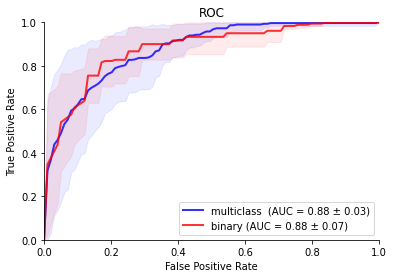

In [13]:
# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\3.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]

# 确定分组数量
n_groups = len(data) // 60 + (len(data) % 60 > 0)
# 使用分组信息进行 k-fold 交叉验证
mean_tpr = np.zeros((3, 100))
mean_fpr = np.linspace(0, 1, 100)
tprs = [[], [], []]
aucs = [[], [], []]

for i in range(n_groups):
    start_idx = i * 60
    end_idx = min((i + 1) * 60, len(data))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data)) if idx not in test_index]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_true.iloc[train_index], y_true.iloc[test_index]

    for j in range(3):
        fpr, tpr, _ = roc_curve(y_test == j, X_test[f'p_{j}'])
        mean_tpr[j] += np.interp(mean_fpr, fpr, tpr)
        tprs[j].append(np.interp(mean_fpr, fpr, tpr))
        tprs[j][-1][0] = 0.0
        auc_val = auc(fpr, tpr)
        aucs[j].append(auc_val)
        print(f'Class {j} AUC: {auc_val:.2f}')
result = [sum(x)/3 for x in zip(*aucs)]
std_auc = np.std(result)
print(result)
print(std_auc)
# 计算三个类别的平均 True Positive Rate
mean_tpr = np.mean([np.mean(tprs[j], axis=0) for j in range(3)], axis=0)
mean_tpr[-1] = 1.0

# 计算平均 ROC 曲线的 AUC
mean_auc = auc(mean_fpr, mean_tpr)
print(mean_auc)

# 绘制平均 ROC 曲线
plt.plot(mean_fpr, mean_tpr, color='blue', label=f'multiclass  (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)

# 填充平均 ROC 曲线下的区域
std_tpr = np.std(np.concatenate(tprs), axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='blue', alpha=0.08)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 从文件路径读取数据
data2_path = r'C:\Users\ynn\Desktop\result\2.xlsx'
data2 = pd.read_excel(data2_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true2 = data2['Y']
y_score2 = data2['p_1']

# 确定分组数量
n_groups2 = len(data) // 60 + (len(data) % 60 > 0)

# 使用分组信息进行 k-fold 交叉验证
mean_tpr2 = 0.0
mean_fpr2 = np.linspace(0, 1, 100)
tprs2 = []
aucs2 = []
for i in range(n_groups2):
    start_idx = i * 60
    end_idx = min((i + 1) * 60, len(data2))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data2)) if idx not in test_index]

    X_train2, X_test2 = data2.iloc[train_index], data2.iloc[test_index]
    y_train2, y_test2 = y_true2.iloc[train_index], y_true2.iloc[test_index]

    fpr, tpr, _ = roc_curve(y_test2, X_test2['p_1'])
    mean_tpr2 += np.interp(mean_fpr2, fpr, tpr)
    tprs2.append(np.interp(mean_fpr2, fpr, tpr))
    tprs2[-1][0]=0.0
    auc_val = auc(fpr, tpr)
    aucs2.append(auc_val)
    print(auc_val)


mean_tpr2=np.mean(tprs2,axis=0)
mean_tpr2[-1]=1.0
mean_auc2=auc(mean_fpr2,mean_tpr2)
std_auc2 = np.std(aucs2, axis=0)
plt.plot(mean_fpr2,mean_tpr2,color='red',label=f'binary (AUC = {mean_auc2:.2f} ± {std_auc2:.2f})',lw=2,alpha=.8)
plt.legend(loc='lower right')
std_tpr2=np.std(tprs2,axis=0)
tprs_upper2=np.minimum(mean_tpr2+std_tpr2,1)
tprs_lower2=np.maximum(mean_tpr2-std_tpr2,0)
plt.fill_between(mean_fpr2,tprs_lower2,tprs_upper2,color='red', alpha=0.08)
plt.show()


### 二-三分类roc曲线（未分组交叉验证同时无法做分组交叉验证 因为要预测两次）
#### 用于与三分类roc曲线（未分组交叉验证）作对比

{0: 0.8498077196980488, 1: 0.8080428685897436, 2: 0.8256035383008784}


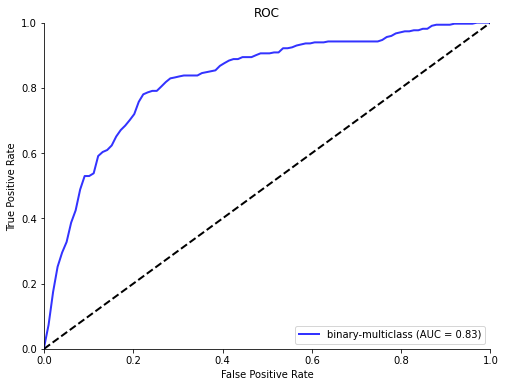

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.interpolate import interp1d

# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\23.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]  # 假设有三个类别的预测概率

# 计算平均 ROC 曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制平均 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(3):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= 3
mean_auc = np.mean(list(roc_auc.values()))
print(roc_auc)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=f'binary-multiclass (AUC = {mean_auc:.2f})', lw=2, alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### 未分组交叉验证条件下 三分类和二-三分类的对比

{0: 0.8498077196980488, 1: 0.8080428685897436, 2: 0.8256035383008784}
{0: 0.877700232635427, 1: 0.9271131073907718, 2: 0.772314986600701}


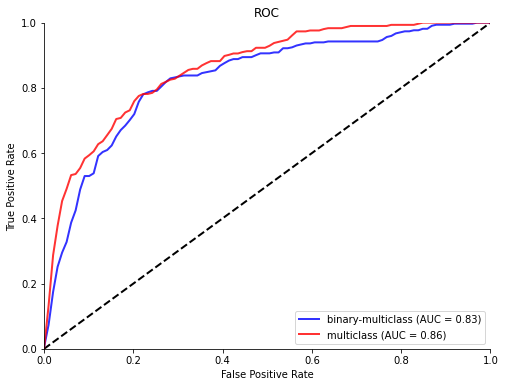

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.interpolate import interp1d

# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\23.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data[['p_0', 'p_1', 'p_2']]  # 假设有三个类别的预测概率

# 计算平均 ROC 曲线
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score.iloc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制平均 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(3):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= 3
mean_auc = np.mean(list(roc_auc.values()))
print(roc_auc)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=f'binary-multiclass (AUC = {mean_auc:.2f})', lw=2, alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 从文件路径读取数据
data2_path = r'C:\Users\ynn\Desktop\result\3.xlsx'
data2 = pd.read_excel(data2_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true2 = data2['Y']
y_score2 = data2[['p_0', 'p_1', 'p_2']]  # 假设有三个类别的预测概率

# 计算平均 ROC 曲线
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(3):
    fpr2[i], tpr2[i], _ = roc_curve(y_true2 == i, y_score2.iloc[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

mean_fpr2 = np.linspace(0, 1, 100)
mean_tpr2 = np.zeros_like(mean_fpr2)
for i in range(3):
    mean_tpr2 += np.interp(mean_fpr2, fpr2[i], tpr2[i])
mean_tpr2 /= 3
mean_auc2 = np.mean(list(roc_auc2.values()))
print(roc_auc2)
plt.plot(mean_fpr2, mean_tpr2, color='red',
         label=f'multiclass (AUC = {mean_auc2:.2f})', lw=2, alpha=.8)
plt.legend(loc='lower right')
plt.show()

### 外部验证roc曲线

[0.9115442278860569, 0.9835082458770614, 0.9775112443778111, 0.9340329835082459, 0.95952023988006]
0.0270264571855922


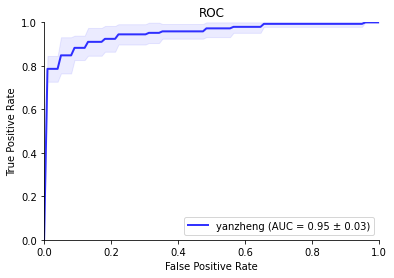

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.interpolate import interp1d

# 从文件路径读取数据
data_path = r'C:\Users\ynn\Desktop\result\yanzheng.xlsx'
data = pd.read_excel(data_path)
# 假设你的数据存储在名为 'data' 的 pandas DataFrame 中
y_true = data['Y']
y_score = data['p_1']

# 确定分组数量
n_groups = len(data) // 52 + (len(data) % 52 > 0)

# 使用分组信息进行 k-fold 交叉验证
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []
for i in range(n_groups):
    start_idx = i * 52
    end_idx = min((i + 1) * 52, len(data))
    test_index = list(range(start_idx, end_idx))
    train_index = [idx for idx in range(len(data)) if idx not in test_index]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_true.iloc[train_index], y_true.iloc[test_index]

    fpr, tpr, _ = roc_curve(y_test, X_test['p_1'])
    mean_tpr += np.interp(mean_fpr, fpr, tpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0]=0.0
    auc_val = auc(fpr, tpr)
    aucs.append(auc_val)
print(aucs)
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs, axis=0)
print(std_auc)
plt.plot(mean_fpr,mean_tpr,color='blue',label=f'yanzheng (AUC = {mean_auc:.2f} ± {std_auc:.2f})',lw=2,alpha=.8)
std_tpr=np.std(tprs,axis=0)
tprs_upper=np.minimum(mean_tpr+std_tpr,1)
tprs_lower=np.maximum(mean_tpr-std_tpr,0)
plt.fill_between(mean_fpr,tprs_lower,tprs_upper,color='blue', alpha=0.08)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)